<a href="https://colab.research.google.com/github/Kat-ies/Coursework/blob/all_detectors/face_detection/Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!git clone https://github.com/Kat-ies/Coursework.git
!git clone --single-branch --branch all_detectors https://github.com/Kat-ies/Coursework.git
%cd Coursework/src
%run for_google_drive.py

Mounted at /content/drive


# **Retrain Faster-RCNN**

Здесь будет небольшой рассказ про основную идею: поработать с Faster-RCNN. А точнее указание, что для начала мы возьмём предобученную модель и дообучим на своих данных (с указанием размера выборки, настроек inetunning и тд..).

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth



Epoch: [0]  [  0/998]  eta: 0:20:38  lr: 0.000001  loss: 2.6823 (2.6823)  loss_classifier: 1.4668 (1.4668)  loss_box_reg: 0.1602 (0.1602)  loss_objectness: 0.7345 (0.7345)  loss_rpn_box_reg: 0.3208 (0.3208)  time: 1.2409  data: 0.1011  max mem: 2348
Epoch: [0]  [100/998]  eta: 0:09:25  lr: 0.000051  loss: 1.0336 (1.2356)  loss_classifier: 0.2696 (0.3848)  loss_box_reg: 0.2440 (0.2046)  loss_objectness: 0.2367 (0.3754)  loss_rpn_box_reg: 0.1606 (0.2708)  time: 0.6741  data: 0.0558  max mem: 6269
Epoch: [0]  [200/998]  eta: 0:08:28  lr: 0.000101  loss: 1.0812 (1.1708)  loss_classifier: 0.2708 (0.3312)  loss_box_reg: 0.5376 (0.3248)  loss_objectness: 0.1235 (0.2920)  loss_rpn_box_reg: 0.1823 (0.2228)  time: 0.6505  data: 0.0428  max mem: 9869
Epoch: [0]  [300/998]  eta: 0:07:32  lr: 0.000151  loss: 0.7082 (1.0140)  loss_classifier: 0.1873 (0.2877)  loss_box_reg: 0.3376 (0.3132)  loss_objectness: 0.1518 (0.2346)  loss_rpn_box_reg: 0.0403 (0.1786)  time: 0.6814  data: 0.0502  max mem: 9869

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Epoch: [2]  [997/998]  eta: 0:00:00  lr: 0.000500  loss: 0.2063 (0.6658)  loss_classifier: 0.0716 (0.1811)  loss_box_reg: 0.0941 (0.2652)  loss_objectness: 0.0209 (0.1211)  loss_rpn_box_reg: 0.0074 (0.0984)  time: 0.6130  data: 0.0192  max mem: 12892
Epoch: [2] Total time: 0:10:25 (0.6271 s / it)


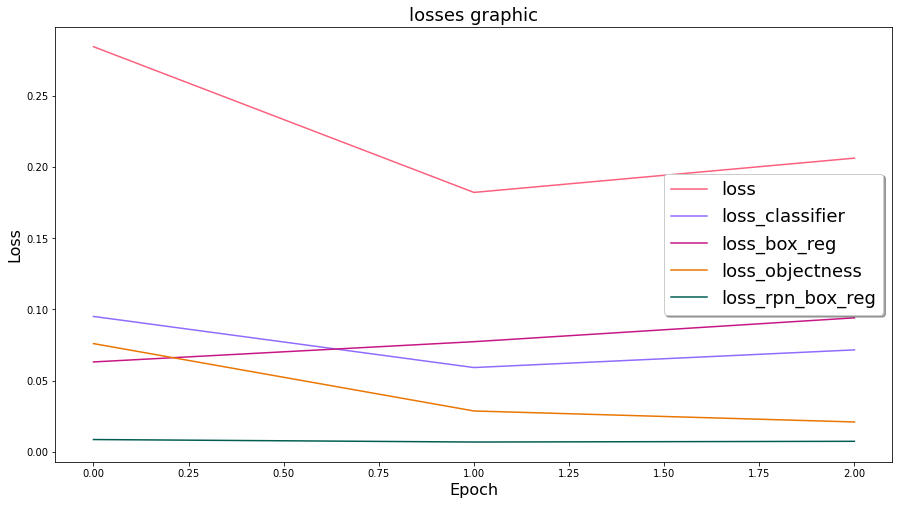

In [ ]:
from face_detection.detectors import FasterRCNNDetector

detector = FasterRCNNDetector(trained=False)
detector.train()

# **Test retrained model**

Здесь будет рассказ про mean average precision + выводы

AP: 0.390445567360395
total positives: 13124
total TP: 6045.0
total FP: 53226.0


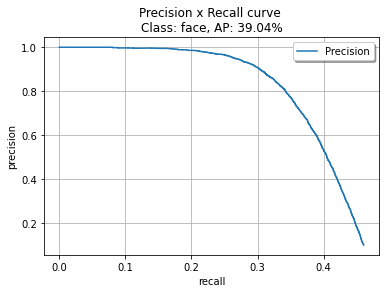

In [ ]:
detector.test()

# **Examples**

Какие-нибудь слова про то, что "а давайте посмотрим на работу сетки в действии на авторских примерах".

Сегодня тестимся на:


* верните мой первый курс
* людей много не бывает
* каждой твари по подушке
* рисованный конкурс "найди все пасхалки"
* "я не узнаю вас в гриме"






## у визуала есть возможность фильтрации по порогу

по умолчанию `threshold=0.5`




In [ ]:
from face_detection.visualization import show_image_examples

show_image_examples(detector, threshold=0)

In [ ]:
# а вот пример  с фильтрацией по score

show_image_examples(detector, threshold=0.5)

# **Немного выводов**
### (и интересных фактов)

мне не нравится то, как Адам рисует рамочки. Их слишком много. Как-то SGD в визуализации лучше себя показал. 
Да и по метрике у него было 37%, что не сильно хуже. (А вообще наверное можно попробовать покрутить всякие гиперпараметры и посмотреть, что будет).

**Важный пункт, про который надо не забыть** : нужно понять, из-за чего получаются недетерминированные результаты, я вроде параметры зафиксировала (когда я запустида Adam-а в первый раз, то точность была 38%, когда перезапустила с новыми файлами - 4.7%, потом 40 а теперь 39%, ыыыыыыыыыы)

Вывод: на данном этапе мне кажется, что достигнутая точность так себе, но добиться лучших результатов пока что не позволяют ресурсы :(

А ещё у меня график какой-то очень гладкий. В примере на гитхабе кривая была другой. Немного подозрительно, надо будет подумать над этим, мб я что-то не так сделала.

# **Пока не придумала название**

А здесь будет место, где пользователь может самостоятельно загрузить любое изображение и посмотреть на результат. (Вообще было бы прикольно сделать API-шку, где был бы какой-нибудь базовый интерфейс, позволяющий поиграться с сетками. Если вдруг у меня останется время, то я бы повыпендривалась таким интересным "приложением":) ).

P.S. На данный момент этот блок не работает, тк у меня почему загружается не весь файл, а лишь 141 байт из 158 мб :(

In [ ]:
import os
import requests
from constants import *


def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params={'id': id}, stream=True)
    token = get_confirm_token(response)

    if token:
        params = {'id': id, 'confirm': token}
        response = session.get(URL, params=params, stream=True)

    save_response_content(response, destination)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None


def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk:  # filter out keep-alive new chunks
                f.write(chunk)


In [ ]:
model_name = 'faster-rcnn'

# ну почему оно работает не так, как я хочу :((
download_file_from_google_drive(id, os.path.join(MODEL_PATH, model_name + '.pth'))


In [ ]:
from google.colab import files
from PIL import Image
from face_detection.transforms import test_transforms

# в будущем хотелось бы иметь что-то вот такое, но для этого надо
# научиться выкачивать файл целиком с помощью get-запроса

def predict_for_user():

    download_file_from_google_drive(id, os.path.join(MODEL_PATH, model_name + '.pth'))
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model = get_object_detection_model()
    model.to(device)
    model.load_state_dict(os.path.join(MODEL_PATH, model_name + '.pth'))
    model.eval()
    
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    image = Image.open(files.upload())
    img = test_transforms(image)


    with torch.no_grad():
        prediction = model([img.to(device)])
    
    show_predictions(image, prediction)

In [ ]:
predict_for_user()

# **Попробуем обучить Faster RCNN с 0**

In [ ]:
from face_detection.detectors import FasterRCNNDetector

detector = FasterRCNNDetector(trained=False, pretrained=False)
detector.train()

# **Потестим то, что обучилось**
(знаете, а выглядит неплохо)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



AP: 0.3655234195793117
total positives: 13124
total TP: 5374.0
total FP: 12774.0


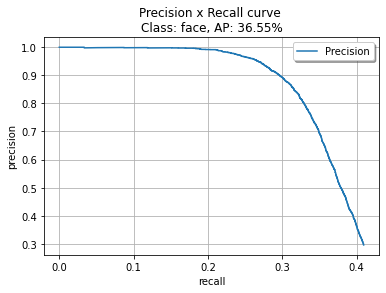

In [ ]:
detector.test()

In [ ]:
from face_detection.visualization import show_image_examples

show_image_examples(detector, threshold=0)

# **Небольшой вывод**

Если посмотреть на mAP, то для предобученной модели он чуть-чуть выше. Казалось бы, что такая модель должна работать лучше. Но вот если смотреть не на цифры, а на реальные примеры, то получается наоборот.

Честно говоря, я пока не могу объяснить это. Тут 2 варианта: или я где-то накосячила, или пора идти читать теорию и искать обоснование там :)  

***upd. Если внимательно сравнить ячейку выше с ячейкой с такими же параметрами для предобученной модели, то можно увидеть, что во 2 случае рамок меньше + они больше соответствуют действительности. Оно даже рисунок распознало!***  

# **Retina Net** 

Здесь мог бы быть текст, но уже 4.29 и я очень-очень хочу спать :(

In [ ]:
from face_detection.detectors import RetinaNetDetector

detector = RetinaNetDetector(trained=False)
detector.train()

# **Test retrained Retina Net**


AP: 0.1966496934968335
total positives: 13124
total TP: 3641.0
total FP: 83608.0


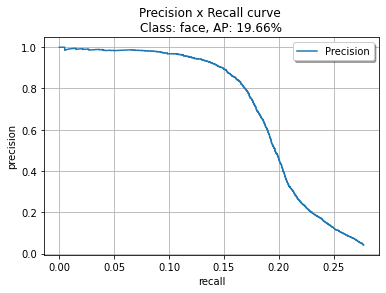

In [ ]:
detector.test()

# **Examples**

In [ ]:
from face_detection.visualization import show_image_examples

show_image_examples(detector, threshold=0.5)

# **Train not pretrained Retina Net**



In [ ]:
from face_detection.detectors import RetinaNetDetector

detector = RetinaNetDetector(trained=False, pretrained=False)
detector.train()

AP: 0.2312824299745355
total positives: 13124
total TP: 4707.0
total FP: 116097.0


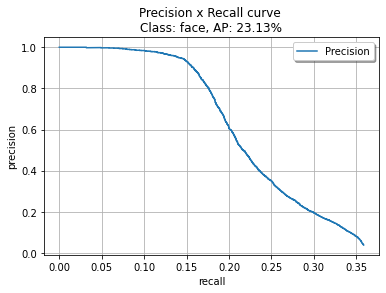

In [ ]:
detector.test()

In [ ]:
from face_detection.visualization import show_image_examples

show_image_examples(detector, threshold=0)

# **Viola-Jhones detector**

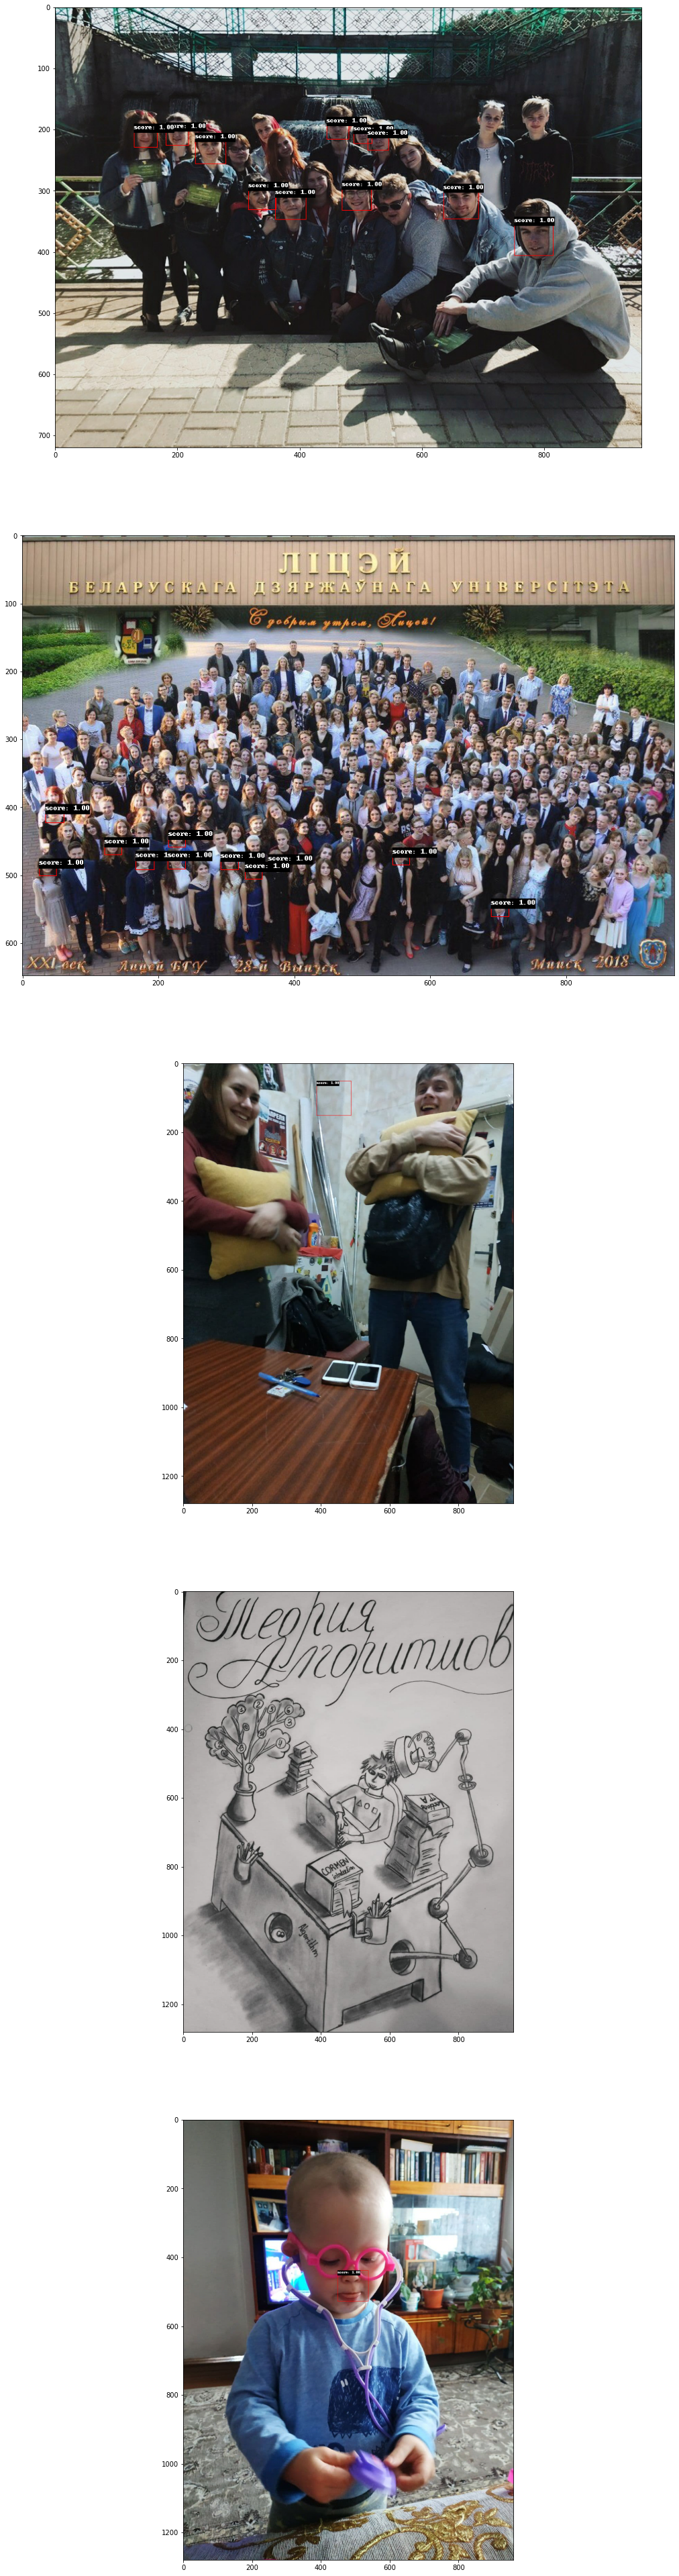

In [2]:
from face_detection.detectors import ViolaJhonesDetector
from face_detection.visualization import show_image_examples

detector = ViolaJhonesDetector()
show_image_examples(detector, threshold=0)

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Apr 25 23:10:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    29W /  70W |    104MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------